## Breve Introducción a scikit-learn

In [2]:
import numpy as np
import sklearn
from matplotlib import pyplot as plt

%matplotlib inline

## Datasets

Scikit-learn cuenta con una API que permite levantar algunos de los conjuntos de datos clásicos de aprendizaje automático. La información detallada se encuentra [acá](https://scikit-learn.org/stable/datasets/index.html). 
Además cuenta con funciones para generar datos sintéticos. A continuación cargaremos la base de datos *iris* que es una de las bases que viene junto con *scikit-learn*. Dicha base se encuentra en el módulo *datasets*.

In [3]:
from sklearn.datasets import load_iris

data = load_iris()

La información del dataset viene almacenada en un diccionario de Python. Para ver las claves del diccionario de invoca al método *keys()*.

In [4]:
print(data.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


Se puede obtener los nombres de las clases, por ejemplo, de dos formas distintas. 

In [5]:
# Preguntando el valor de la clave
print(data['target_names'])
# Directamente mediante data.
print(data.target_names)

['setosa' 'versicolor' 'virginica']
['setosa' 'versicolor' 'virginica']


Las características están almacenadas en la clave *data* y los valores objetivos (en este caso etiquetas) en *target*. En ambos casos son almacenados como arreglos de *numpy*.

In [6]:
X, y = data.data, data.target
# Se pueden invocar métodos de numpy, por ej shape
print(X.shape, y.shape)

(150, 4) (150,)


Se muestran las dos primeras caracteristicas

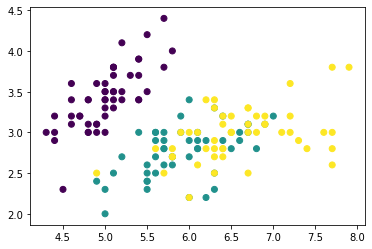

In [7]:
plt.scatter(X[:,0],X[:,1],c=y)

**Ejercicio:** ¿Es cierto que la muestra en la posición 125 pertence a la clase *virginica*?

In [10]:
print(y[125])

2


No, es versicolor

**Ejercicio:** ¿Cuánto vale el largo del pétalo para dicha muestra?

In [13]:
print(data.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [17]:
print(X[125,2]) # valor del largo del petalo en cm

6.0


## Generación de conjuntos de entrenamiento y test

Para dividir el conjunto de datos en un subconjunto de entrenamiento y uno de validación, es útil el método *train_test_split* del módulo *model_selection*. La siguiente celda divide el conjunto de datos en 75% de entrenamiento y 25% para test.

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(112, 4) (112,)
(38, 4) (38,)


**Ejercicio** Generar una división del conjunto de datos de forma que el 60% sea de entrenamiento y el 40% restante para test.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_test.shape[0]/X_train.shape[0])

(90, 4) (90,)
(60, 4) (60,)
0.6666666666666666


## Preprocesamiento de los datos

Scikit-learn cuenta con el módulo [preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html) que tiene una serie de métodos útiles para realizar transformaciones de las características. Algunos de ellos son:  
* Estandarización de los datos
* Normalización de los datos
* Transformación polinómica de características
* Manejo de datos faltantes

In [21]:
# Se importa el modulo que hace la transformacion
from sklearn.preprocessing import StandardScaler

# Se encuentran los parametros de estandarizacion
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)

In [22]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

Una vez encontrados los parámetros de la estandarización se pueden consultar. Observar que los atributos calculados por el estimador, en este caso el *StandardScaler*, se diferencian de los demás atributos porque el nombre termina con guión bajo.

In [23]:
print(scaler.mean_)
print(scaler.scale_)
print(scaler.n_samples_seen_)

[5.88111111 3.07111111 3.80333333 1.23222222]
[0.87214862 0.40940185 1.83735619 0.79747209]
90


La normalización de los datos se realiza con el método *transform()*.

Text(0.5, 1.0, 'Características de entrenamiento estandarizadas')

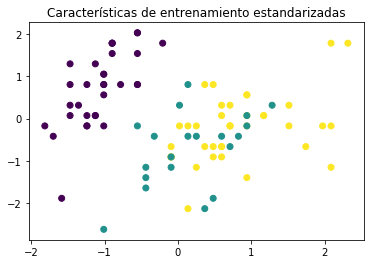

In [24]:
# Se estandarizan los datos de entrenamiento
X_train_std = scaler.transform(X_train)

# Se estandarizan los datos de test
X_test_std = scaler.transform(X_test)

plt.scatter(X_train_std[:,0],X_train_std[:,1],c=y_train)
plt.title('Características de entrenamiento estandarizadas')

**Ejercicio:** Realizar una transformación de las características originales de forma que queden en el rango [-0.5,0.5] utilizando alguna de las funciones del modulo *preporcessing*.

In [29]:
min_max_scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-0.5,0.5))
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.fit_transform(X_test)
print(np.max(X_train_minmax))
print(np.min(X_train_minmax))
print(np.max(X_test_minmax))
print(np.min(X_test_minmax))



0.5000000000000001
-0.5
0.5000000000000001
-0.5


# Clasificación de imágenes

Se utilizarán algunos de los clasificadores de scikit-learn para distinguir imágenes de *gatos* de *no gatos*.

### Los datos

La siguiente celda carga los datos. La base cuenta con conjunto de imágenes para entrenamiento y un conjunto para test. En este caso las características a utilizar son directamente los valores de los píxeles de las imágenes. 

In [30]:
from aux_datos import load_cats_dataset
features_train, y_train, features_test, y_test, clases = load_cats_dataset()
print('Se levantaron %d imágenes de entrenamiento' % len(features_train))
print('%d pertenecen a la clase %s y %d a la clase %s' % (np.sum(y_train==1),clases[0].decode("utf-8"),
                                                          np.sum(y_train==0),clases[1].decode("utf-8"))  )
print('Se levantaron %d imágenes de test' % len(features_test))
print('%d pertenecen a la clase %s y %d a la clase %s' % (np.sum(y_test==1),clases[0].decode("utf-8"),
                                                          np.sum(y_test==0),clases[1].decode("utf-8"))  )

print('Las imágenes son de tamaño [%d, %d, %d] ' % (features_train.shape[1:]))


Se levantaron 209 imágenes de entrenamiento
72 pertenecen a la clase non-cat y 137 a la clase cat
Se levantaron 50 imágenes de test
33 pertenecen a la clase non-cat y 17 a la clase cat
Las imágenes son de tamaño [64, 64, 3] 


Cada vez que se ejecuta la siguiente celda se muestra un ejemplo de cada una de las clases. 

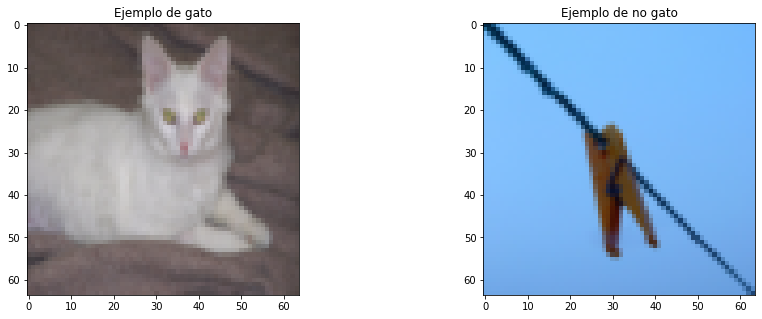

In [38]:
# Ejemplo de una imagen gato
indices_gatos = [i for i, label in enumerate(y_train) if label]
pos = np.random.randint(len(indices_gatos))
gato = features_train[indices_gatos[pos]]

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(gato)
plt.title('Ejemplo de gato')

# Ejemplo de una imagen no gato
indices_no_gatos = [i for i, label in enumerate(y_train) if not label]
pos = np.random.randint(len(indices_no_gatos))
gato = features_train[indices_no_gatos[pos]]
plt.subplot(1,2,2)
plt.imshow(features_train[indices_no_gatos[pos]])
plt.title('Ejemplo de no gato')
plt.show()

## Normalización de características

In [39]:
# Se hace el reshape de las características
feat_train_flat = features_train.reshape(features_train.shape[0], -1)  
feat_test_flat = features_test.reshape(features_test.shape[0], -1)  

# Se normalizan los datos para que las características queden en el rango [-0.5, 0.5]
feat_train_n = feat_train_flat/255. - 0.5 
feat_test_n = feat_test_flat/255.  - 0.5

## Regresión lineal

In [40]:
def mostrar_pesos(W):
    'Función auxiliar que muestra los pesos aprendidos en un modelo lineal'
    plt.figure()
    image = np.reshape(W, (64,64,3))
    plt.imshow((image-image.min())/(image.max()-image.min()))
    plt.tight_layout()

(12288,)


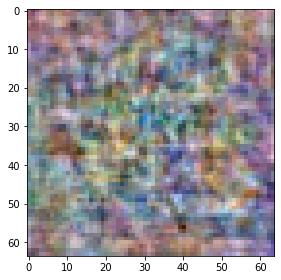

In [41]:
from sklearn.linear_model import LinearRegression
# Se define el clasificador
lr = LinearRegression()
# Se encuentran los parámetros
lr.fit(feat_train_n,  y_train.flatten())
# Se los muestra
W_lr = lr.coef_
print(W_lr.shape)
mostrar_pesos(W_lr)

## Regresión lineal mediante descenso por gradiente

(1, 12288)


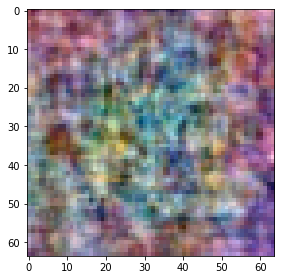

In [42]:
from sklearn.linear_model import SGDClassifier
# Se define el clasificador
sgd = SGDClassifier()
# Se encuentran los parámetros
sgd.fit(feat_train_n,  y_train.flatten())
# Se los muestra
W_sgd = sgd.coef_
print(W_sgd.shape)
mostrar_pesos(W_sgd)

## Regresión logística

Accuracy con conjunto de entrenamiento: 1.000000
Accuracy con conjunto de test: 0.700000


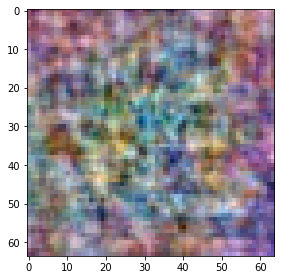

In [43]:
from sklearn.linear_model import LogisticRegression
# Se define el clasificador
log_clf = LogisticRegression(solver='sag', max_iter=10000)
# Se encuentran los parámetros
log_clf.fit(feat_train_n,  y_train.flatten())
# Se predicen los valores de las muestras de entrenamiento y test
y_pred_train = log_clf.predict(feat_train_n)
y_pred_test = log_clf.predict(feat_test_n)
# Se calcula el desempeño para los conjuntos de entrenamiento y test
print("Accuracy con conjunto de entrenamiento: %f" % log_clf.score(feat_train_n, y_train.flatten()))
print("Accuracy con conjunto de test: %f" % log_clf.score(feat_test_n, y_test))
# Se muestran los parámetros aprendidos
W_log = log_clf.coef_
mostrar_pesos(W_log)

## Red neuronal de dos capas

In [44]:
from sklearn.neural_network import MLPClassifier

In [45]:
# Se define una red similar a la del práctico 
mlp = MLPClassifier(hidden_layer_sizes=(7,), activation='relu',max_iter=10000, alpha=0,
                    solver='sgd', verbose=10, tol=1e-4, random_state=43,
                    learning_rate_init=.001)

mlp.fit(feat_train_n, y_train.flatten())
print("Accuracy con conjunto de entrenamiento: %f" % mlp.score(feat_train_n, y_train.flatten()))
print("Accuracy con conjunto de test: %f" % mlp.score(feat_test_n, y_test))

Iteration 1, loss = 0.75356300
Iteration 2, loss = 0.74971394
Iteration 3, loss = 0.74162241
Iteration 4, loss = 0.73162610
Iteration 5, loss = 0.72034162
Iteration 6, loss = 0.70848296
Iteration 7, loss = 0.69710830
Iteration 8, loss = 0.68523722
Iteration 9, loss = 0.67378970
Iteration 10, loss = 0.66284513
Iteration 11, loss = 0.65235522
Iteration 12, loss = 0.64242716
Iteration 13, loss = 0.63293157
Iteration 14, loss = 0.62382486
Iteration 15, loss = 0.61679991
Iteration 16, loss = 0.60973186
Iteration 17, loss = 0.60318123
Iteration 18, loss = 0.59642506
Iteration 19, loss = 0.58983008
Iteration 20, loss = 0.58322007
Iteration 21, loss = 0.57762786
Iteration 22, loss = 0.57175588
Iteration 23, loss = 0.56613107
Iteration 24, loss = 0.56050652
Iteration 25, loss = 0.55499960
Iteration 26, loss = 0.54958147
Iteration 27, loss = 0.54469704
Iteration 28, loss = 0.53948061
Iteration 29, loss = 0.53556232
Iteration 30, loss = 0.53005894
Iteration 31, loss = 0.52512176
Iteration 32, los

Iteration 257, loss = 0.12693796
Iteration 258, loss = 0.12627357
Iteration 259, loss = 0.12567212
Iteration 260, loss = 0.12510199
Iteration 261, loss = 0.12442744
Iteration 262, loss = 0.12380131
Iteration 263, loss = 0.12302570
Iteration 264, loss = 0.12243991
Iteration 265, loss = 0.12180634
Iteration 266, loss = 0.12108165
Iteration 267, loss = 0.12037558
Iteration 268, loss = 0.11983444
Iteration 269, loss = 0.11945391
Iteration 270, loss = 0.11884890
Iteration 271, loss = 0.11805292
Iteration 272, loss = 0.11784715
Iteration 273, loss = 0.11705285
Iteration 274, loss = 0.11579519
Iteration 275, loss = 0.11469630
Iteration 276, loss = 0.11475509
Iteration 277, loss = 0.11627292
Iteration 278, loss = 0.11611510
Iteration 279, loss = 0.11577641
Iteration 280, loss = 0.11522538
Iteration 281, loss = 0.11419029
Iteration 282, loss = 0.11300579
Iteration 283, loss = 0.11157269
Iteration 284, loss = 0.11032780
Iteration 285, loss = 0.10951129
Iteration 286, loss = 0.10889055
Iteration 

Iteration 511, loss = 0.04672892
Iteration 512, loss = 0.04666459
Iteration 513, loss = 0.04656755
Iteration 514, loss = 0.04643830
Iteration 515, loss = 0.04632411
Iteration 516, loss = 0.04626408
Iteration 517, loss = 0.04620182
Iteration 518, loss = 0.04614949
Iteration 519, loss = 0.04610256
Iteration 520, loss = 0.04604786
Iteration 521, loss = 0.04584553
Iteration 522, loss = 0.04559202
Iteration 523, loss = 0.04528019
Iteration 524, loss = 0.04505444
Iteration 525, loss = 0.04487864
Iteration 526, loss = 0.04474242
Iteration 527, loss = 0.04469646
Iteration 528, loss = 0.04463854
Iteration 529, loss = 0.04451684
Iteration 530, loss = 0.04436739
Iteration 531, loss = 0.04423259
Iteration 532, loss = 0.04410178
Iteration 533, loss = 0.04396269
Iteration 534, loss = 0.04384146
Iteration 535, loss = 0.04375970
Iteration 536, loss = 0.04369023
Iteration 537, loss = 0.04365920
Iteration 538, loss = 0.04355212
Iteration 539, loss = 0.04355439
Iteration 540, loss = 0.04338801
Iteration 

## Medidas de desempeño

En el módulo [metrics](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) scikit-learn tiene implementadas varias medidas de desempeño. Tres de las mas utilizadas son: *accuracy*, *precision* y *recall* 

In [46]:
# Accuracy
from sklearn.metrics import accuracy_score
y_train_pred = mlp.predict(feat_train_n)
y_test_pred = mlp.predict(feat_test_n)
print("Accuracy con conjunto de entrenamiento: %f" % accuracy_score(y_train, y_train_pred))
print("Accuracy con conjunto de test: %f" % accuracy_score(y_test, y_test_pred))

Accuracy con conjunto de entrenamiento: 1.000000
Accuracy con conjunto de test: 0.660000


In [47]:
# Precision = TP/(TP+FP)
from sklearn.metrics import precision_score
y_train_pred = mlp.predict(feat_train_n)
y_test_pred = mlp.predict(feat_test_n)
print("Precision con conjunto de entrenamiento: %f" % precision_score(y_train, y_train_pred))
print("Precision con conjunto de test: %f" % precision_score(y_test, y_test_pred))

Precision con conjunto de entrenamiento: 1.000000
Precision con conjunto de test: 0.785714


In [48]:
# Recall = TP/(TP+FN)
from sklearn.metrics import recall_score
y_train_pred = mlp.predict(feat_train_n)
y_test_pred = mlp.predict(feat_test_n)
print("Recall con conjunto de entrenamiento: %f" % recall_score(y_train, y_train_pred))
print("Recall con conjunto de test: %f" % recall_score(y_test, y_test_pred))

Recall con conjunto de entrenamiento: 1.000000
Recall con conjunto de test: 0.666667


# Ejercicio 

Mejorar el desempeño, en términos de *accuracy*, tanto de la **red neuronal de dos capas** como del clasificador que utiliza **regresión logística**. Algunas de las modificaciones que se pueden evaluar son las siguientes:
- Modificación del *learning rate*
- Regularización mediante *weight decay*
- Regularización mediante *early stopping*
- En el caso de la red neuronal, además:
    - Modificación del número de nodos en capa oculta de la red
    - Función de *activación* utilizada
    - Inicialización

In [ ]:
# ...